# LSTM Neural Network for Share Price Prediction

This advanced tool is under development for the precise analysis of individual stock performance. It's designed to evolve into a comprehensive solution catering to retail investors with compact portfolios, as well as scalable to meet the demands of extensive portfolio management.

### Considerations

#### Dataset Configuration for Model Training
The current iteration employs a dataset of fixed dimensions, adhering to the principle that data imputation is generally to be avoided unless faced with inconsistent data lengths across different stocks. Should such a scenario arise, an initial exploration using K-means clustering will be considered to address data uniformity.

#### Training Set Scope and Predictive Accuracy
The training dataset encompasses daily stock values spanning from 2012 to 2017, with validation performed on 2018 data. It's important to note that stock behavior may vary across different entities; thus, extrapolation to new stocks requires careful consideration of their unique volatility patterns, as evidenced by our analysis of TATA shares.

### Additional Considerations

#### Model Validation and Backtesting
- **Backtesting Rigor**: Extensive backtesting against historical data not used in training is crucial to validate the model's predictive power and robustness over different market conditions.
- **Forward Testing**: Implementing a phase of forward testing (paper trading) in real-time market conditions to observe the model's performance without financial risk.

#### Regulatory and Ethical Considerations
- **Compliance**: Ensuring adherence to financial market regulations and guidelines, including data privacy laws and trading practices.
- **Transparency**: Providing clear explanations of the model's decision-making process to maintain trust and transparency.

#### Technical and Operational Scalability
- **Infrastructure Scalability**: Assessing the infrastructure needed to scale the tool for handling larger datasets or more users.
- **Real-Time Data Processing**: Considering the capability to process and analyze data in real-time for timely predictions in fast-moving markets.

#### User Interface and Experience
- **Accessibility**: Designing an intuitive and accessible interface for users of varying expertise levels.
- **Customization and Control**: Offering users the ability to customize settings and preferences for enhanced utility and satisfaction.

#### Continuous Improvement and Learning
- **Model Updates**: Planning for regular updates to the model based on new data, market trends, and user feedback.
- **User Feedback Loop**: Establishing mechanisms to collect and incorporate user feedback for continuous improvement.

#### Market Adaptability
- **Diverse Market Conditions**: Ensuring the model is tested and adaptable to different market conditions.
- **Global Markets**: Considering the implications of expanding the tool's capabilities to include global markets.




In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

!pip install keras
!pip install tensorflow

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
%matplotlib inline


### Training data

The training data used is found from an online data science forum called "Medium" and is of TATAGLOBAL previous share history from 2010 to 2018. Values are taken from the opening share price and the daily high for use within the model. 

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

### Data Normalisation

Normalisation of all the numerical values to a common scale in order to help the accuracy of the model.

In [3]:

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

## Timesteps for Data

The LSTM requires a 3D array. Timesteps of 60 are created before using numpy to convert to the array. Finally, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

In [4]:
X_train = []  # Initialize as list
y_train = []  # Initialize as list
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # Convert to NumPy arrays after appending


## Creating the LSTM Model

**Keras Imports:**
.Sequential for initializing the neural network
.LSTM to add the LSTM layer Dropout for preventing .overfitting with dropout layers
.Dense to add a densely connected neural network layer.

The LSTM layer is added with the following arguments: 50 units is the dimensionality of the output space, return_sequences=True is necessary for stacking LSTM layers so the consequent LSTM layer has a three-dimensional sequence input, and input_shape is the shape of the training dataset.

Specifying 0.2 in the Dropout layer means that 20% of the layers will be dropped. Following the LSTM and Dropout layers, we add the Dense layer that specifies an output of one unit. To compile our model we use the Adam optimizer and set the loss as the mean_squared_error. After that, we fit the model to run for 100 epochs (the epochs are the number of times the learning algorithm will work through the entire training set) with a batch size of 32.

In [5]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)



Epoch 1/100

62/62 [==============================] - 11s 71ms/step - loss: 0.0105
Epoch 2/100
62/62 [==============================] - 5s 85ms/step - loss: 0.0029
Epoch 3/100
62/62 [==============================] - 5s 84ms/step - loss: 0.0033
Epoch 4/100
62/62 [==============================] - 5s 86ms/step - loss: 0.0036
Epoch 5/100
62/62 [==============================] - 5s 86ms/step - loss: 0.0028
Epoch 6/100
62/62 [==============================] - 5s 83ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 5s 83ms/step - loss: 0.0022
Epoch 8/100
62/62 [==============================] - 5s 85ms/step - loss: 0.0022
Epoch 9/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0018
Epoch 10/100
62/62 [==============================] - 5s 82ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 5s 86ms/step - loss: 0.0018
Epoch 12/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0017
Epoch 13/100
62/62 [=

## Predicting

Before predicting future stock prices, we have to modify the test set (notice similarities to the edits we made to the training set): merge the training set and the test set on the 0 axis, set 60 as the time step again, use MinMaxScaler, and reshape data. Then, inverse_transform puts the stock prices in a normal readable format.

In [6]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
# Convert X_test to a numpy array after the loop
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


## Results

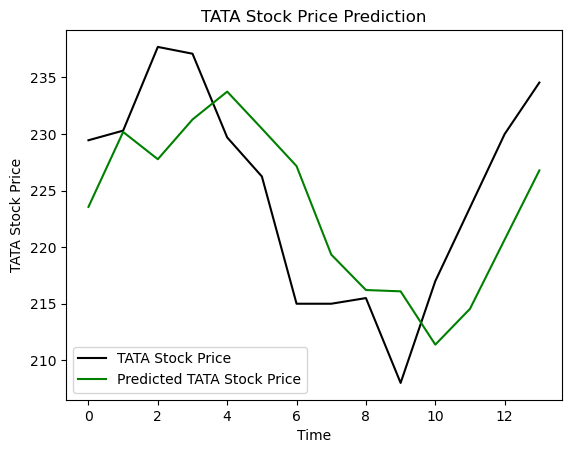

In [10]:
import matplotlib.pyplot as plt

# Adjusting indices to match your requirement
# Since your loop for X_test starts at 60, assuming that corresponds to real_stock_price indices
start_index = 2  # To start plotting from the 3rd data point

# Slicing the arrays to exclude data up to the 2nd data point
real_stock_price_adjusted = real_stock_price[start_index:]
predicted_stock_price_adjusted = predicted_stock_price[start_index:]

# Plotting
plt.plot(real_stock_price_adjusted, color='black', label='TATA Stock Price')
plt.plot(predicted_stock_price_adjusted, color='green', label='Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()
